In [1]:
from helper_functions import *
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations
import numpy as np

In [2]:
#TODO: Clean up this notebook a LOT. make it readable. 

# Goals:
* show and model a potential system for qualitatively analyzing a feature's impact in a dataset

# Tools:
* `Test Harness` ( -- link to Hamed's GitHub -- )
* `BlackBoxAuditor` ( -- link to BBA GitHub -- ) 
* `SHAP` ( -- link to SHAP GitHub -- )


# (1) Create Feature


*talk about how the feature(s) was generated, what is going to be measured, or whatever*

# (2) Test Through Test Harness

*talk about what the harness will give you that's useful and relevant*

# (3) Analyze Feature 

*talk about BBA and SHAP and what they can offer*

# (4) Quantify Feature's Importance

In [55]:
new_metrics = pd.read_csv('/home/jupyter/tacc-work/test-harness-v3/versioned-datasets/data/protein-design/structural_metrics/Rocklin.v2.structural_metrics.csv',comment='#')

In [75]:
foo = df_sd2e[['name','dataset','stabilityscore_cnn_calibrated']].merge(new_metrics,on=['name','dataset'])

In [100]:
max(foo_rocklin['percent_hydrophobic'])

41.9

In [93]:
foo_rocklin = foo[foo['dataset']=='Rocklin']
low_nres_helix = foo_rocklin[foo_rocklin['nres_helix']<=12]
low_nres_helix_high_hydroph = low_nres_helix[low_nres_helix['percent_hydrophobic']>=31]
np.var(low_nres_helix_high_hydroph['stabilityscore_cnn_calibrated'])

0.352446276383384

In [28]:
new_features = pd.read_csv("/home/jupyter/tacc-work/test-harness-v3/test-harness/scripts/analyze_new_metrics_for_rocklin_data/colnames_for_all_features_from_hugh.csv",header=None)[0].to_list()
entropy_features = ['S_PC','Mean_H_entropy','Mean_L_entropy','Mean_E_entropy',
                        'Mean_res_entropy','SumH_entropies','SumL_entropies','SumE_entropies',
                        'H_max_entropy','H_min_entropy','H_range_entropy',
                        'L_max_entropy','L_min_entropy','L_range_entropy','E_max_entropy','E_min_entropy',
                        'E_range_entropy']

In [42]:
shap_rocklin_features_importances

,Feature,Importance
0,surface_freq_T,0.028203
1,percent_hydrophobic,0.025790
2,buried_npsa_FAMILYVW,0.021430
3,freq_T,0.019735
4,buried_npsa,0.016360
5,percent_hydrophobic_AFILMVWY,0.014979
6,rama_prepro_and_p_aa_pp,0.012645
7,exposed_npsa,0.010069
8,freq_L,0.008609
9,helices_freq_A,0.008141


In [46]:
#topology unspecified, just new features
shap_rocklin_features_importances = pd.DataFrame(data=[('surface_freq_T', 0.028203105435592592), ('percent_hydrophobic', 0.02579047347029868), ('buried_npsa_FAMILYVW', 0.021429655918378202), ('freq_T', 0.019734904366119774), ('buried_npsa', 0.016359821182385343), ('percent_hydrophobic_AFILMVWY', 0.014978542876475756), ('rama_prepro_and_p_aa_pp', 0.01264507678383834), ('exposed_npsa', 0.010068961992008827), ('freq_L', 0.008608928516291608), ('helices_freq_A', 0.008141031025354233), ('buried_npsa_FAMILYVW_boundary', 0.008059021530097348), ('buried_npsa_FAMILYVW_surface', 0.007944576763653791), ('helices_freq_R', 0.00720131723502247), ('percent_hydrophobic_AFILMVWY_surface', 0.007031808148418597), ('percent_hydrophobic_surface', 0.006275458472962458), ('buried_psa_surface', 0.006191437539747615), ('percent_hydrophobic_core', 0.005662379300635508), ('percent_hydrophobic_boundary', 0.005440910002608878), ('freq_KR', 0.005405911503795024), ('surface_freq_R', 0.005027989278980353), ('percent_hydrophobic_AFILMVWY_boundary', 0.004601426707925072), ('helices_freq_L', 0.004405892596048061), ('freq_R', 0.004341039431230969), ('freq_TV', 0.0035606912425765296), ('core_freq_L', 0.003500889361949866), ('freq_RR', 0.0031837847785543493), ('freq_GV', 0.0030106625630477923), ('freq_G', 0.0030043524483279473), ('helices_freq_I', 0.0029457609154352575), ('surface_freq_V', 0.002924223968758258), ('core_freq_A', 0.002781790522901089), ('buried_psa_core', 0.0027381071266113412), ('freq_VT', 0.0025597442743459905), ('freq_M', 0.0025199339193525154), ('helices_freq_T', 0.002515425211445654), ('helices_freq_F', 0.0024744623550294574), ('freq_IL', 0.0024412399954749516), ('freq_A', 0.0023336038372253885), ('freq_GA', 0.00231190632273807), ('surface_freq_E', 0.002301545728797618), ('buried_psa', 0.002098270717600779), ('surface_freq_Q', 0.002052795056218804), ('percent_aromatic_no_his', 0.00203736186111976), ('buried_npsa_FAMILYVW_core', 0.0020369065544452347), ('buried_npsa_core', 0.002035059374323308), ('helices_freq_V', 0.002003861773930872), ('core_freq_V', 0.001975634591051266), ('percent_aromatic_no_his_boundary', 0.0019498045293740388), ('freq_TT', 0.0019224506783711464), ('freq_EL', 0.0018683810722734753), ('freq_W', 0.001853696633135483), ('freq_I', 0.0017870213260775148), ('buried_npsa_surface', 0.0017063425634199674), ('freq_LK', 0.0017036765599833354), ('helices_freq_M', 0.0016778165465442336), ('buried_psa_boundary', 0.0016743489919905177), ('freq_V', 0.0016108574729719273), ('freq_KT', 0.0015954510932643783), ('freq_E', 0.0015511824880429187), ('percent_aromatic_no_his_core', 0.0014774097701012406), ('helices_freq_K', 0.0014603974028785148), ('freq_F', 0.0013360753530503578), ('freq_N', 0.0013290576931516743), ('freq_LL', 0.0012966904708760433), ('core_freq_W', 0.0012901108355539213), ('freq_RG', 0.0012268571850553246), ('surface_freq_G', 0.001211302848147784), ('boundary_freq_N', 0.0011875051245694428), ('freq_TL', 0.0011616800517705826), ('helices_freq_S', 0.0011451637554205584), ('boundary_freq_S', 0.001143068567625378), ('boundary_freq_Q', 0.001133560249995388), ('surface_freq_P', 0.001088557341107353), ('freq_P', 0.0010836046562631306), ('percent_hydrophobic_AFILMVWY_core', 0.0010642621869643328), ('freq_S', 0.00103353854388415), ('freq_TS', 0.001021550135588393), ('surface_freq_K', 0.0010168811925786471), ('boundary_freq_I', 0.0009926121115452326), ('freq_EE', 0.0009879884811407839), ('freq_NL', 0.0009757343548075662), ('freq_AA', 0.0009735212238097035), ('freq_GQ', 0.0009675015569670191), ('freq_AG', 0.0008976907773098144), ('core_freq_M', 0.0008963397809456757), ('freq_FA', 0.0008927910934910392), ('helices_freq_D', 0.0008586800564182379), ('freq_VS', 0.0008372772001178992), ('boundary_freq_R', 0.0008334890745227027), ('helices_freq_P', 0.0008332722504427951), ('surface_freq_D', 0.000811059509475385), ('freq_H', 0.0008070146073922412), ('freq_DE', 0.0007803757941038899), ('surface_freq_H', 0.0007129781837429165), ('core_freq_F', 0.0007018011311370145), ('boundary_freq_L', 0.0006492914356479758), ('boundary_freq_V', 0.0006491444724548315), ('surface_freq_S', 0.0006246957777488587), ('freq_LR', 0.0006215279233611267), ('helices_freq_Y', 0.0005769279554671544), ('freq_K', 0.0005571782004622827), ('boundary_freq_P', 0.0005378568578819006), ('boundary_freq_A', 0.0005142773320725986), ('freq_TE', 0.0005117291744537749), ('boundary_freq_Y', 0.0005094539436765331), ('percent_polar_core', 0.000508650042482133), ('freq_D', 0.0004898806298806145), ('buried_npsa_boundary', 0.0004817149314749092), ('surface_freq_I', 0.0004769285246453266), ('helices_freq_W', 0.0004397180087868524), ('freq_NG', 0.00043622094320919393), ('freq_IV', 0.0004347328930177818), ('helices_freq_N', 0.00042956049553487843), ('core_freq_I', 0.00042343134806081156), ('boundary_freq_K', 0.0004180421176878897), ('freq_QG', 0.0004152551606951451), ('freq_KW', 0.0004004366818689315), ('helices_freq_Q', 0.000392732883982758), ('freq_Q', 0.00038757539052824177), ('freq_GY', 0.0003739758258075879), ('helices_freq_E', 0.00037002012099404517), ('surface_freq_N', 0.00036561339910442256), ('freq_AK', 0.00036553906622851), ('freq_YT', 0.00035921055824943593), ('freq_GT', 0.00035257052272858), ('freq_EA', 0.00032834059017125056), ('freq_VH', 0.00032331502192267767), ('freq_VN', 0.0003135114688259561), ('freq_RN', 0.0003131312180034514), ('freq_GL', 0.0003043202233225623), ('boundary_freq_G', 0.0002996117496166621), ('freq_HF', 0.0002966048800227493), ('freq_Y', 0.0002811517402180198), ('freq_KA', 0.00027473013788661775), ('core_freq_Y', 0.00027407782766339866), ('freq_VE', 0.00027082881805785467), ('freq_KK', 0.00026586998195079684), ('boundary_freq_E', 0.00026278574270208356), ('freq_RI', 0.0002621670443647989), ('freq_EK', 0.00025677536290868357), ('freq_MA', 0.00023191033732103457), ('freq_AE', 0.00022392074037915215), ('freq_NP', 0.00022322972589156837), ('freq_IK', 0.00021568860073329233), ('freq_KF', 0.00020417993577690643), ('freq_GE', 0.00019923458169355315), ('freq_AR', 0.000187323105749896), ('freq_KL', 0.00018605431069229766), ('freq_GK', 0.00016643731925879398), ('boundary_freq_W', 0.00016433523735663496), ('freq_KG', 0.00016398567230049146), ('boundary_freq_D', 0.00016320539819393194), ('freq_HV', 0.00016121327374878861), ('freq_WK', 0.0001559958242257442), ('surface_freq_L', 0.00015537015159404745), ('freq_GD', 0.00015107357967676275), ('freq_FD', 0.00015014826228610203), ('freq_RL', 0.00014998576200458857), ('freq_EQ', 0.00014830203475972763), ('freq_VD', 0.00013888978039214766), ('freq_EV', 0.00013581239271840607), ('freq_RE', 0.0001346563228329414), ('freq_EI', 0.0001341812505759434), ('freq_GN', 0.00013276004893196305), ('freq_QT', 0.0001298821080760603), ('freq_TI', 0.00012555108681892545), ('freq_PE', 0.00011854740831993573), ('freq_RV', 0.0001177173577759148), ('freq_RA', 0.0001174004087600216), ('freq_AT', 0.00011574921145629828), ('freq_KE', 0.00011272212953027226), ('freq_IT', 0.00010831448718114773), ('freq_RK', 0.00010400844037912318), ('boundary_freq_T', 9.967324199224567e-05), ('freq_TD', 9.927699274308566e-05), ('freq_VR', 9.813829864500318e-05), ('freq_DG', 9.756893490498325e-05), ('freq_TY', 9.410622681359458e-05), ('freq_TW', 9.382149711199501e-05), ('freq_LA', 9.372935858153645e-05), ('freq_TA', 9.135278355291659e-05), ('freq_AL', 9.030111966967059e-05), ('freq_LT', 9.030074835805791e-05), ('freq_FT', 9.013340518987101e-05), ('freq_RQ', 8.887465823844626e-05), ('freq_HG', 8.795857961736857e-05), ('freq_MK', 8.689799919776928e-05), ('freq_KN', 8.576827736300467e-05), ('freq_LE', 8.449523335194113e-05), ('freq_EM', 8.419388761585672e-05), ('freq_TF', 8.394512303208801e-05), ('freq_ER', 8.221194465996594e-05), ('freq_ET', 8.220288850804085e-05), ('percent_aromatic_no_his_surface', 7.981380086968877e-05), ('freq_IE', 7.943102280548697e-05), ('freq_YH', 7.909333955295244e-05), ('freq_QK', 7.567126158700062e-05), ('freq_IS', 7.251572128745808e-05), ('freq_KV', 6.973657233421335e-05), ('freq_YD', 6.745624989891622e-05), ('freq_SE', 6.703890962441209e-05), ('freq_DD', 6.66450094504863e-05), ('freq_DV', 6.647663394368964e-05), ('freq_VQ', 6.578046904338976e-05), ('freq_QP', 6.241661425652011e-05), ('freq_NT', 5.772854559386757e-05), ('boundary_freq_F', 5.5876524904412076e-05), ('freq_VK', 5.502139371804349e-05), ('freq_GR', 5.4767634249337714e-05), ('freq_NE', 5.306632544400156e-05), ('freq_TR', 5.2072446998724174e-05), ('freq_PV', 4.9130800437468225e-05), ('freq_EW', 4.741402530293908e-05), ('freq_IR', 4.722999897071017e-05), ('freq_AQ', 4.684587185002943e-05), ('freq_RT', 4.585777029289249e-05), ('freq_NQ', 4.437870604350268e-05), ('freq_AP', 4.3072204627036504e-05), ('freq_DR', 4.255992605690828e-05), ('freq_II', 4.0250439659217056e-05), ('freq_QA', 3.871185394466101e-05), ('freq_LG', 3.6929116504592606e-05), ('freq_DT', 3.5170480567153295e-05), ('freq_KI', 3.2248678278855e-05), ('freq_IA', 3.177107178649477e-05), ('freq_QV', 3.141082420517023e-05), ('freq_EN', 3.122311149686833e-05), ('freq_QI', 3.119735933492577e-05), ('freq_TQ', 3.11789279014838e-05), ('freq_ED', 3.0756239296445745e-05), ('freq_RS', 3.0547506780321935e-05), ('freq_FS', 3.0193346103521277e-05), ('freq_WA', 3.0091488520815255e-05), ('freq_QN', 2.991730561830829e-05), ('freq_IH', 2.9456947169181334e-05), ('freq_GI', 2.92132707191384e-05), ('freq_WR', 2.8896891079838866e-05), ('freq_QE', 2.7499852589022483e-05), ('freq_ST', 2.6542406936951768e-05), ('freq_YS', 2.6308121511487e-05), ('freq_NN', 2.5269794968680045e-05), ('freq_KQ', 2.5267274342715965e-05), ('freq_DK', 2.48868205411634e-05), ('freq_KY', 2.4884170313052558e-05), ('freq_KD', 2.3657397025533544e-05), ('freq_DL', 2.3014566539446785e-05), ('freq_LN', 2.271014856168549e-05), ('freq_DQ', 2.162408764966142e-05), ('freq_YK', 2.0498473794168604e-05), ('freq_VV', 1.8858642274324757e-05), ('freq_LI', 1.8678877215330018e-05), ('freq_AN', 1.8595734020312706e-05), ('freq_HI', 1.7568820109798684e-05), ('freq_EF', 1.7033611021497187e-05), ('freq_TK', 1.664249661206625e-05), ('freq_YE', 1.5910255333921126e-05), ('freq_KH', 1.5866350911843457e-05), ('freq_DN', 1.5684901746591596e-05), ('freq_PD', 1.5398853598148332e-05), ('freq_LD', 1.4970108738716928e-05), ('surface_freq_M', 1.4740710321176067e-05), ('freq_RF', 1.4736342604521273e-05), ('surface_freq_F', 1.4590196256647233e-05), ('freq_LQ', 1.4426765390861536e-05), ('freq_QR', 1.420755139610279e-05), ('freq_VG', 1.4001033456777401e-05), ('freq_TN', 1.3706130593354987e-05), ('freq_EY', 1.3646359799757174e-05), ('freq_FE', 1.3628198781611501e-05), ('freq_SD', 1.3585826651846113e-05), ('freq_VA', 1.332327743324857e-05), ('freq_RD', 1.3032497909497959e-05), ('freq_DP', 1.2669387638863983e-05), ('core_freq_G', 1.2006850139274233e-05), ('freq_GF', 1.1782394238871339e-05), ('freq_AV', 1.1664375710549878e-05), ('freq_PG', 1.1417729074338363e-05), ('freq_SP', 1.128771809229883e-05), ('boundary_freq_H', 1.1001902003936886e-05), ('freq_WQ', 1.0613194259168501e-05), ('freq_TP', 1.0611005340642263e-05), ('freq_LH', 1.0126086872353867e-05), ('freq_QL', 9.970810773708271e-06), ('freq_YR', 9.861588466635375e-06), ('freq_IN', 9.791411296303139e-06), ('freq_NK', 9.444333391061331e-06), ('freq_AY', 9.0123335223979e-06), ('freq_YN', 8.983307960031406e-06), ('freq_ID', 8.668367105396274e-06), ('core_freq_T', 8.391594450362535e-06), ('freq_AI', 7.958811807066864e-06), ('freq_RW', 7.957395426250207e-06), ('freq_EG', 7.79761099124796e-06), ('freq_WV', 7.792443708523825e-06), ('freq_VI', 7.594943717772928e-06), ('freq_FR', 7.511941292199961e-06), ('freq_AW', 7.470735316087603e-06), ('freq_LS', 7.152521138994506e-06), ('freq_DA', 7.043463030157675e-06), ('freq_NV', 6.651023751060893e-06), ('freq_AD', 6.426692162613066e-06), ('freq_SS', 6.394508239583868e-06), ('boundary_freq_M', 6.325340624588792e-06), ('freq_FK', 6.080421942473675e-06), ('freq_ES', 6.067468517279287e-06), ('core_freq_S', 5.90312743306375e-06), ('freq_PT', 5.813110273930778e-06), ('freq_DY', 5.244854564516513e-06), ('helices_freq_H', 5.225695625576499e-06), ('freq_FP', 5.205455674675008e-06), ('surface_freq_A', 5.1754039760386345e-06), ('surface_freq_Y', 5.069615454068801e-06), ('freq_NR', 4.8281542170076276e-06), ('freq_YA', 4.825220341230718e-06), ('freq_KS', 4.821458010486243e-06), ('freq_HL', 4.717326134479708e-06), ('freq_SK', 4.698850720333125e-06), ('freq_KM', 4.639636991901572e-06), ('freq_NA', 4.6255308081358175e-06), ('freq_WE', 4.574865993387425e-06), ('freq_GG', 4.494730276662988e-06), ('freq_IG', 4.4092414517051835e-06), ('freq_QD', 4.315272887849866e-06), ('freq_EP', 4.252106823273336e-06), ('freq_VL', 4.244569618371278e-06), ('freq_SR', 4.243604819763198e-06), ('freq_FG', 4.1229012417131565e-06), ('freq_HK', 3.863088748804573e-06), ('freq_PN', 3.846539275326258e-06), ('freq_IQ', 3.797817325288399e-06), ('freq_PK', 3.6710729867199436e-06), ('core_freq_K', 3.6221314122887913e-06), ('freq_MR', 3.5866135142837202e-06), ('freq_TH', 3.5101424736924955e-06), ('freq_PR', 3.4626089264347715e-06), ('freq_QF', 3.3885462890047234e-06), ('freq_FN', 3.3844869092955745e-06), ('freq_RY', 3.3206330251013944e-06), ('freq_EH', 3.311604358269256e-06), ('freq_NI', 3.1313212144724255e-06), ('core_freq_R', 3.114159395552729e-06), ('freq_DS', 3.0406470241419425e-06), ('freq_PS', 3.0226572063693664e-06), ('freq_FH', 2.9294563781776584e-06), ('freq_DI', 2.8989068033447688e-06), ('freq_QY', 2.8470283038213326e-06), ('freq_QQ', 2.8348892150224253e-06), ('freq_RP', 2.7630878647848238e-06), ('freq_PL', 2.7048027927909207e-06), ('freq_FQ', 2.606456367215555e-06), ('freq_YL', 2.603930083128956e-06), ('freq_WT', 2.501300478433268e-06), ('freq_FV', 2.4451004657396863e-06), ('core_freq_P', 2.349215666973666e-06), ('freq_HN', 2.3167064436423343e-06), ('freq_AS', 2.252811780055964e-06), ('freq_FI', 2.2470374886302377e-06), ('freq_PI', 2.2089008857619234e-06), ('core_freq_Q', 2.1698853243299345e-06), ('freq_LV', 2.1466335552492693e-06), ('freq_YQ', 2.142674668832736e-06), ('freq_SV', 2.1300221813547686e-06), ('freq_QS', 2.0821263931426076e-06), ('freq_GS', 2.0776894697798444e-06), ('freq_NY', 2.0142803385441183e-06), ('freq_PA', 1.949163265404365e-06), ('freq_LY', 1.9286415788853573e-06), ('freq_WH', 1.9183522047159787e-06), ('freq_WI', 1.8976609924024188e-06), ('freq_HT', 1.686526320514145e-06), ('freq_YV', 1.6448092616710658e-06), ('freq_SI', 1.5941108938214186e-06), ('core_freq_D', 1.5338821929099696e-06), ('freq_VP', 1.5144567916738352e-06), ('freq_QW', 1.509969945759761e-06), ('freq_SQ', 1.4737181126751245e-06), ('freq_YG', 1.4479878520083224e-06), ('freq_IW', 1.4183169005082366e-06), ('freq_PQ', 1.3450735192922677e-06), ('freq_DF', 1.3281540893640006e-06), ('freq_SN', 1.2650274727377776e-06), ('freq_RM', 1.2647054152476282e-06), ('freq_KP', 1.2425053572369621e-06), ('freq_AH', 1.2329344164164071e-06), ('freq_DH', 1.1285570676858746e-06), ('freq_HS', 1.0392263507154015e-06), ('freq_WL', 1.0324505723135692e-06), ('freq_HY', 1.0237978290676213e-06), ('freq_NF', 1.0213011389626705e-06), ('freq_ND', 1.012029956086583e-06), ('freq_HA', 9.939114252222767e-07), ('freq_HE', 9.67119509918678e-07), ('freq_GP', 9.077769969243206e-07), ('freq_IY', 9.02977556467306e-07), ('freq_PF', 9.024738355449311e-07), ('freq_SG', 8.987727785000362e-07), ('freq_ME', 8.68016361052922e-07), ('core_freq_H', 8.593603677915547e-07), ('core_freq_E', 8.556038016215212e-07), ('freq_SA', 8.524120031265238e-07), ('freq_HQ', 8.214742930848813e-07), ('freq_TG', 8.091818878981855e-07), ('freq_DW', 7.971288103167452e-07), ('surface_freq_W', 7.960269931434892e-07), ('freq_QH', 7.788376952013546e-07), ('freq_ML', 7.584247429014923e-07), ('freq_SL', 7.370659291809091e-07), ('freq_HW', 7.146345301695195e-07), ('freq_WG', 7.110508408122188e-07), ('freq_SH', 6.695609354849696e-07), ('freq_NW', 6.659851176728432e-07), ('freq_WN', 6.634096505390757e-07), ('freq_LW', 6.179313153625766e-07), ('freq_LF', 6.147428587009123e-07), ('freq_LP', 6.018570150585132e-07), ('n_buried_hbonds', 5.926631829711548e-07), ('freq_YP', 5.816284256813728e-07), ('freq_NS', 5.625040232669616e-07), ('freq_QM', 5.469251895621648e-07), ('freq_WW', 5.434363607809898e-07), ('freq_PP', 5.323946927365514e-07), ('freq_YI', 5.099653646040093e-07), ('freq_TM', 5.007357382091512e-07), ('freq_HP', 4.716905012460544e-07), ('freq_PY', 4.5323514295885946e-07), ('freq_VY', 4.431753957207067e-07), ('freq_HD', 4.006627645629285e-07), ('freq_PH', 3.5649546379777587e-07), ('freq_IP', 3.3942925846958074e-07), ('freq_AM', 3.3785106566400927e-07), ('freq_MH', 3.154950368976572e-07), ('freq_IF', 3.13616301392906e-07), ('freq_AF', 2.9103009713589803e-07), ('freq_WS', 2.7803634713776647e-07), ('freq_FL', 2.7445279555360946e-07), ('freq_VF', 2.731349529290111e-07), ('freq_RH', 2.667758581323852e-07), ('freq_HR', 2.543300483551369e-07), ('freq_NH', 2.5072125838929684e-07), ('core_freq_N', 2.4146748875923417e-07), ('freq_CP', 2.3858076234113603e-07), ('freq_MW', 2.0312413285701024e-07), ('surface_freq_C', 1.9872645483904517e-07), ('freq_SF', 1.7846881982629278e-07), ('freq_LM', 1.6860984958485995e-07), ('freq_MD', 1.3470175617018202e-07), ('freq_VW', 1.142449266981744e-07), ('freq_MV', 7.658051610251048e-08), ('freq_GW', 5.763792015416954e-08), ('freq_GH', 2.577571822495533e-08), ('boundary_freq_C', 0.0), ('core_freq_C', 0.0), ('freq_AC', 0.0), ('freq_C', 0.0), ('freq_CA', 0.0), ('freq_CC', 0.0), ('freq_CD', 0.0), ('freq_CE', 0.0), ('freq_CF', 0.0), ('freq_CG', 0.0), ('freq_CH', 0.0), ('freq_CI', 0.0), ('freq_CK', 0.0), ('freq_CL', 0.0), ('freq_CM', 0.0), ('freq_CN', 0.0), ('freq_CQ', 0.0), ('freq_CR', 0.0), ('freq_CS', 0.0), ('freq_CT', 0.0), ('freq_CV', 0.0), ('freq_CW', 0.0), ('freq_CY', 0.0), ('freq_DC', 0.0), ('freq_DM', 0.0), ('freq_EC', 0.0), ('freq_FC', 0.0), ('freq_FF', 0.0), ('freq_FM', 0.0), ('freq_FW', 0.0), ('freq_FY', 0.0), ('freq_GC', 0.0), ('freq_GM', 0.0), ('freq_HC', 0.0), ('freq_HH', 0.0), ('freq_HM', 0.0), ('freq_IC', 0.0), ('freq_IM', 0.0), ('freq_KC', 0.0), ('freq_LC', 0.0), ('freq_MC', 0.0), ('freq_MF', 0.0), ('freq_MG', 0.0), ('freq_MI', 0.0), ('freq_MM', 0.0), ('freq_MN', 0.0), ('freq_MP', 0.0), ('freq_MQ', 0.0), ('freq_MS', 0.0), ('freq_MT', 0.0), ('freq_MY', 0.0), ('freq_NC', 0.0), ('freq_NM', 0.0), ('freq_PC', 0.0), ('freq_PM', 0.0), ('freq_PW', 0.0), ('freq_QC', 0.0), ('freq_RC', 0.0), ('freq_SC', 0.0), ('freq_SM', 0.0), ('freq_SW', 0.0), ('freq_SY', 0.0), ('freq_TC', 0.0), ('freq_VC', 0.0), ('freq_VM', 0.0), ('freq_WC', 0.0), ('freq_WD', 0.0), ('freq_WF', 0.0), ('freq_WM', 0.0), ('freq_WP', 0.0), ('freq_WY', 0.0), ('freq_YC', 0.0), ('freq_YF', 0.0), ('freq_YM', 0.0), ('freq_YW', 0.0), ('freq_YY', 0.0), ('helices_freq_C', 0.0), ('helices_freq_G', 0.0)],
                                           columns=['Feature','Importance'])


In [49]:
shap_rocklin_features_importances.iloc[:25,:].to_csv("./dataframes/shap_rocklin_features_new.csv",index=False)

In [5]:
#topology unspecified, old+new features
shap_rocklin_old_and_new = pd.read_csv('/home/jupyter/tacc-work/test-harness-v3/test-harness/scripts/analyze_new_metrics_for_rocklin_data/test_harness_results/runs/run_QOqGED9aJvoAr/feature_importances.csv')

saved Importances-Distribution
saved Horizontal-Bar-Plot


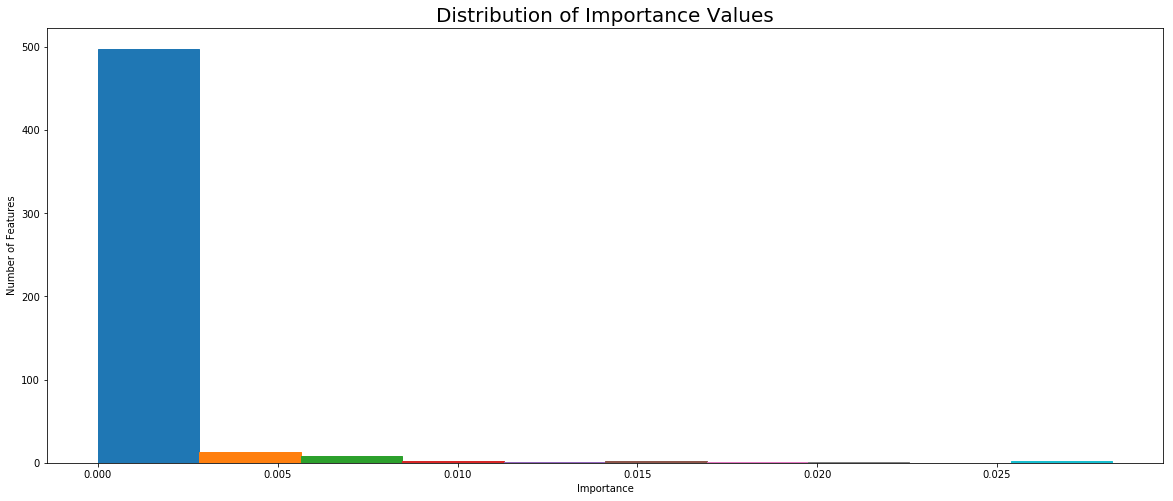

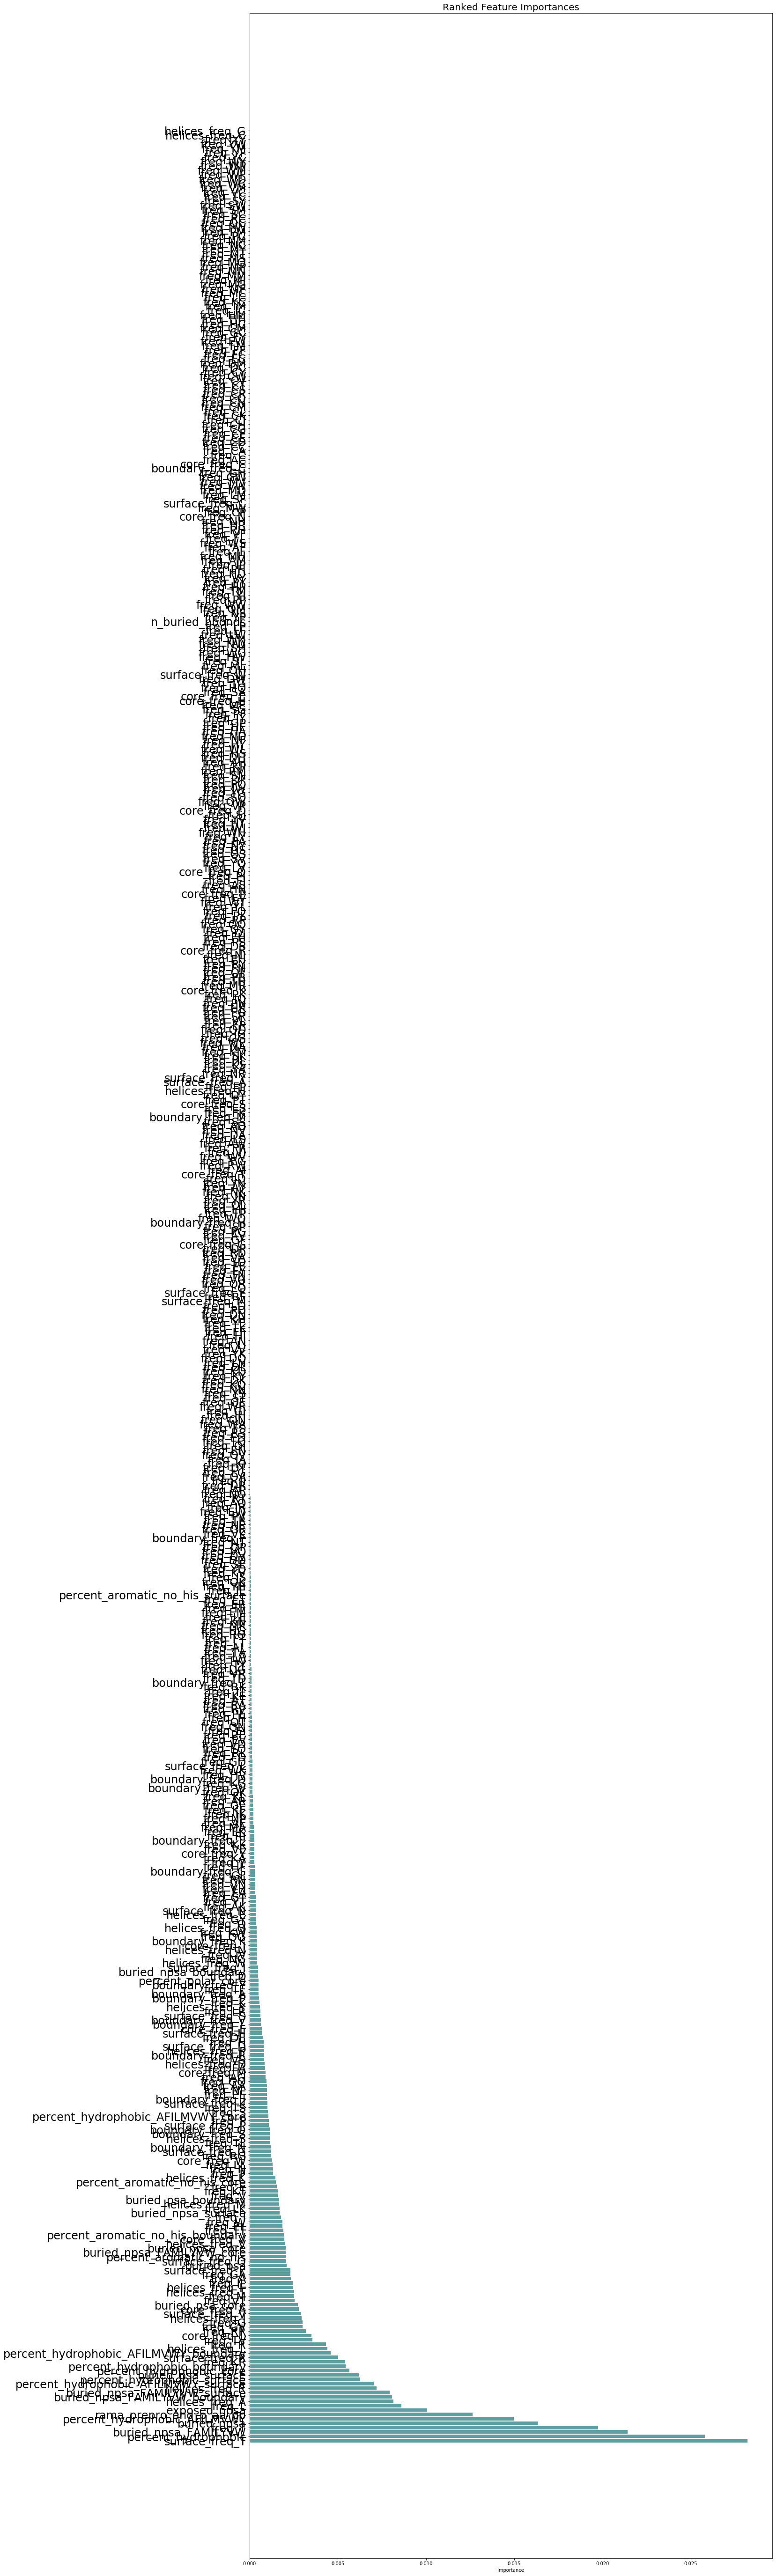

In [6]:
output = get_plots(shap_rocklin_features_importances.iloc[:,:])

for figure_name in output.keys():
    output[figure_name].savefig('/home/jupyter/tacc-work/model_building/dataframes/saved_plots/shap/topology_specific_plots_rocklin_features/%s.jpeg'%figure_name.replace(" ",'-'))
    print("saved %s"%figure_name.replace(" ",'-'))

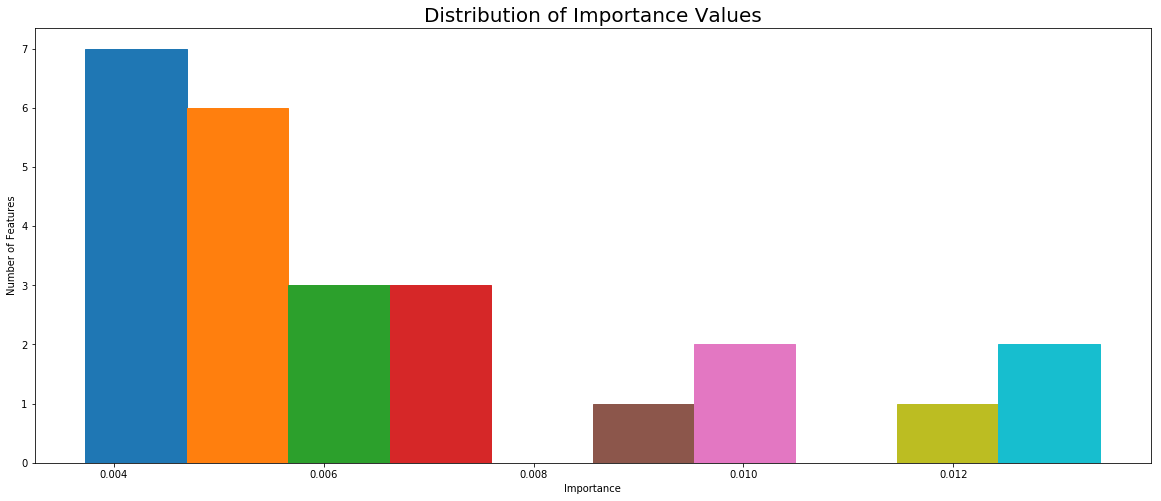

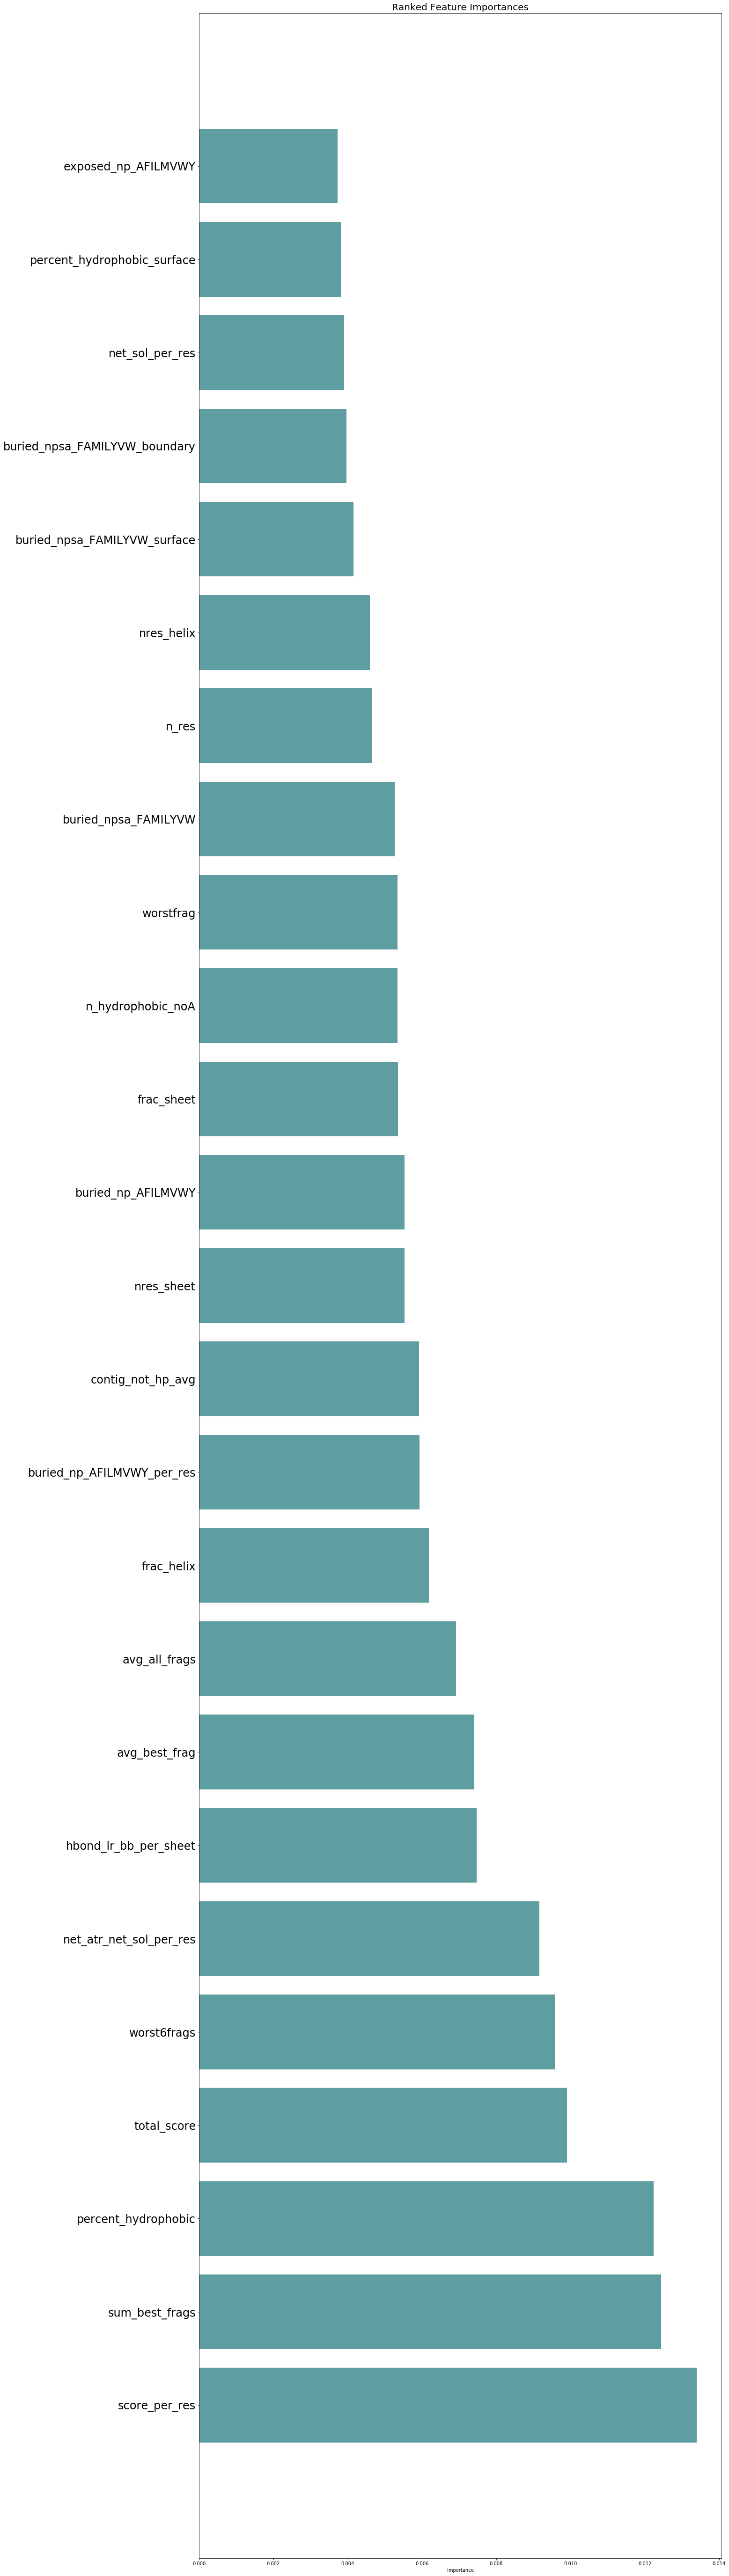

In [7]:
output2 = get_plots(shap_rocklin_old_and_new.iloc[:25,:])

In [8]:
fig1 = output['Horizontal Bar Plot']
fig2 = output2['Horizontal Bar Plot']

In [45]:
shap_rocklin_old_and_new['new_feature'] = shap_rocklin_old_and_new['Feature'].isin(new_features)
shap_rocklin_old_and_new[['Feature','Importance']].iloc[:25,:].to_csv('./dataframes/shap_old_and_new_top_25.csv',index=False)

In [10]:
output.keys()

dict_keys(['Importances Distribution', 'Horizontal Bar Plot'])

In [11]:
#topology specified dataframes 
shap_rocklin_feature_importances_heeh = pd.read_csv("/home/jupyter/tacc-work/test-harness-v3/test-harness/scripts/analyze_new_metrics_for_rocklin_data/test_harness_results/runs/run_56ZmB53ba58RY/feature_importances.csv")
#.88 accuracy, .88 balanced acc, .935 AUC, .79 precision

shap_rocklin_feature_importances_eehee = pd.read_csv("/home/jupyter/tacc-work/test-harness-v3/test-harness/scripts/analyze_new_metrics_for_rocklin_data/test_harness_results/runs/run_6AxeAQGr2Gb8q/feature_importances.csv")
#.88 accuracy, .85 balanced acc, .936 AUC, .79 precision

shap_rocklin_feature_importances_ehee = pd.read_csv("/home/jupyter/tacc-work/test-harness-v3/test-harness/scripts/analyze_new_metrics_for_rocklin_data/test_harness_results/runs/run_56dNk86kxd8eY/feature_importances.csv")
#.88 accuracy, #.85 balanced acc, .935 AUC, .79 precision

shap_rocklin_feature_importances_hhh = pd.read_csv("/home/jupyter/tacc-work/test-harness-v3/test-harness/scripts/analyze_new_metrics_for_rocklin_data/test_harness_results/runs/run_5dWMmOGAWoPp5/feature_importances.csv")
#.88 accuracy, #.85 balanced acc, .935 AUC, .79 precision

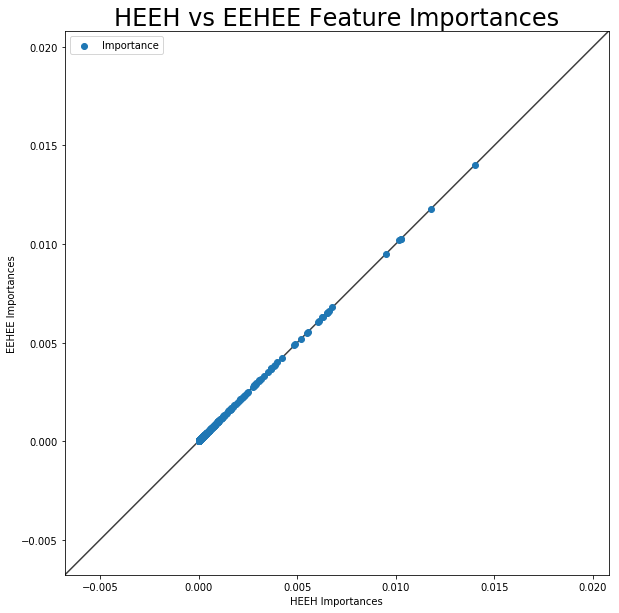

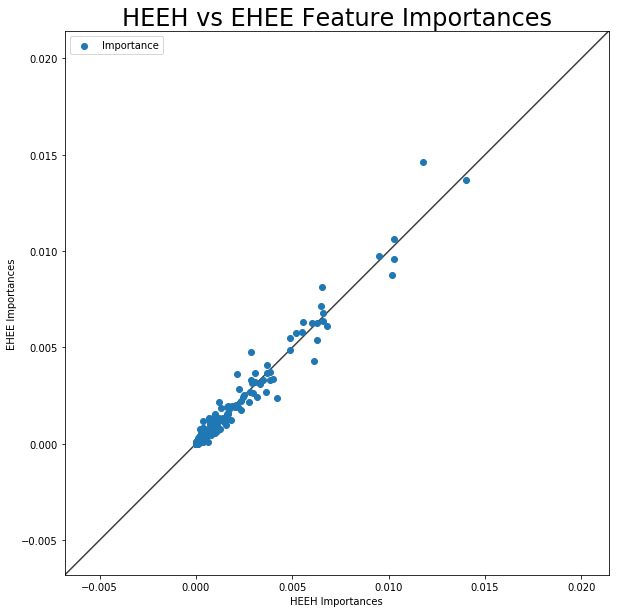

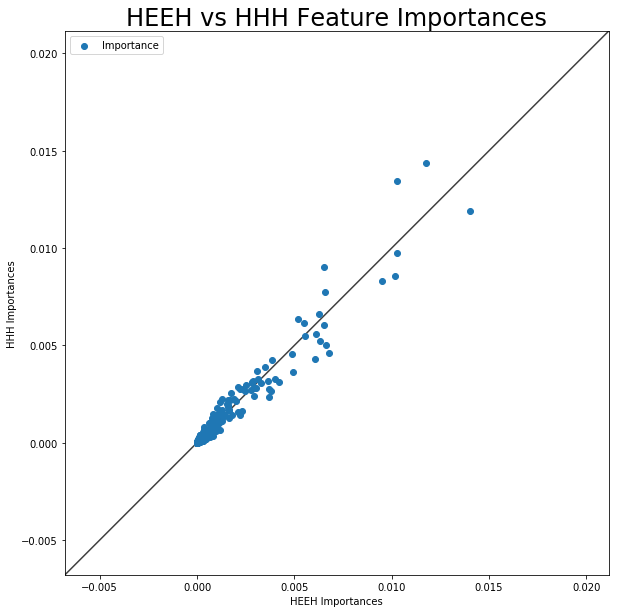

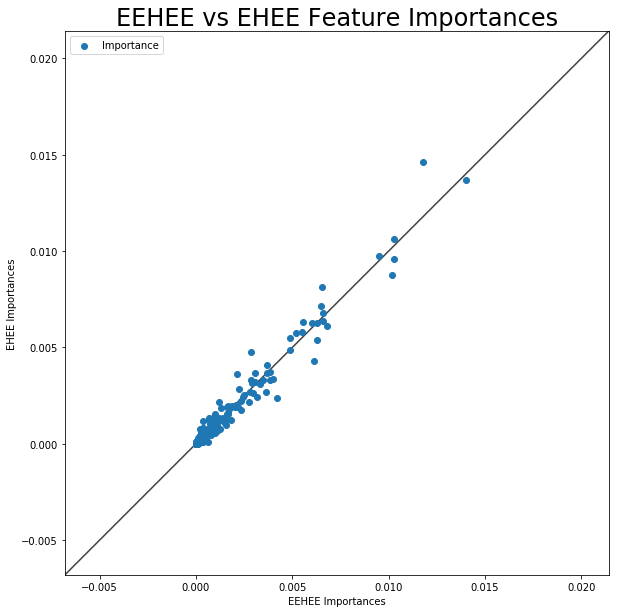

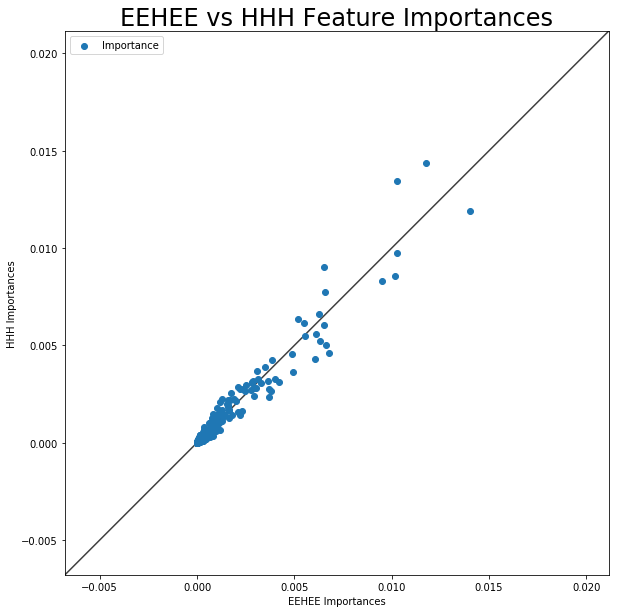

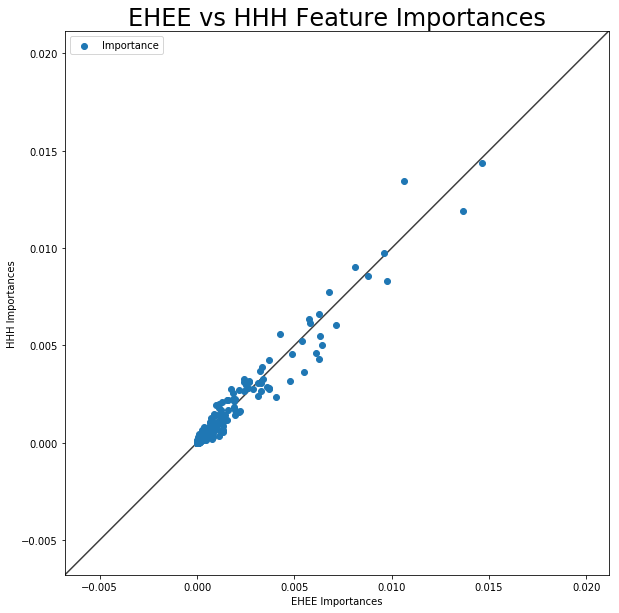

In [12]:
topology_names = ['HEEH','EEHEE','EHEE','HHH']
topology_df = [shap_rocklin_feature_importances_heeh,shap_rocklin_feature_importances_heeh,shap_rocklin_feature_importances_ehee,shap_rocklin_feature_importances_hhh]

#add a True/False column labelling each row as a "new_feature" or not
for df in topology_df:
    df['new_feature'] = df['Feature'].isin(new_features)

    


topology_specific_scatter_plots(topology_names, topology_df,output_path='/home/jupyter/tacc-work/model_building/dataframes/saved_plots/shap/topology_specific_plots_rocklin_features/')

In [13]:
zipped_df = list(zip(topology_df,topology_names))
most_important_per_topology = topology_specific_feature_importance(zipped_df)

most_important_per_topology = get_most_important_features_per_topology(zipped_df)
most_important_per_topology_new_features = most_important_per_topology[most_important_per_topology['new_feature']==True]
most_important_per_topology_old_features = most_important_per_topology[most_important_per_topology['new_feature']==False]

/home/jupyter/tacc-work/model_building/helper_functions.py:162: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  current_features = df_i[df_i['Importance'] - df_j["Importance"] >0]['Feature'].tolist()


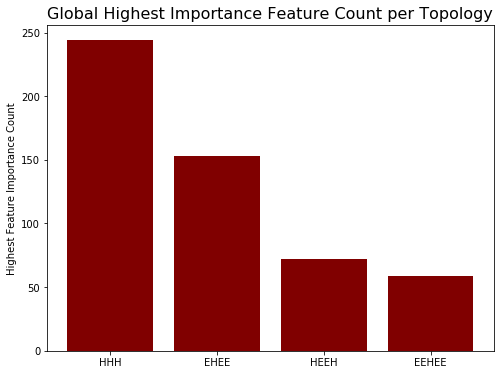

{'Global-Highest-Importance': <Figure size 576x432 with 1 Axes>}

In [14]:
get_global_highest_importance_per_topology(most_important_per_topology_new_features,color='maroon')

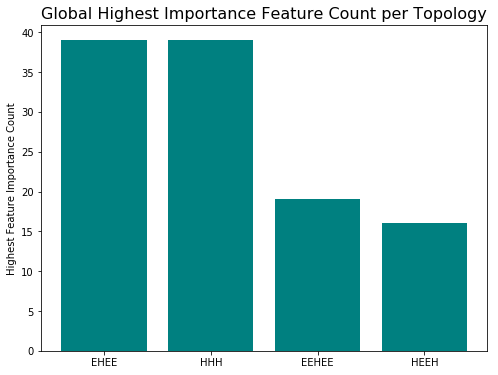

{'Global-Highest-Importance': <Figure size 576x432 with 1 Axes>}

In [15]:
get_global_highest_importance_per_topology(most_important_per_topology_old_features,color='teal')

# New+Old Features and S_PC

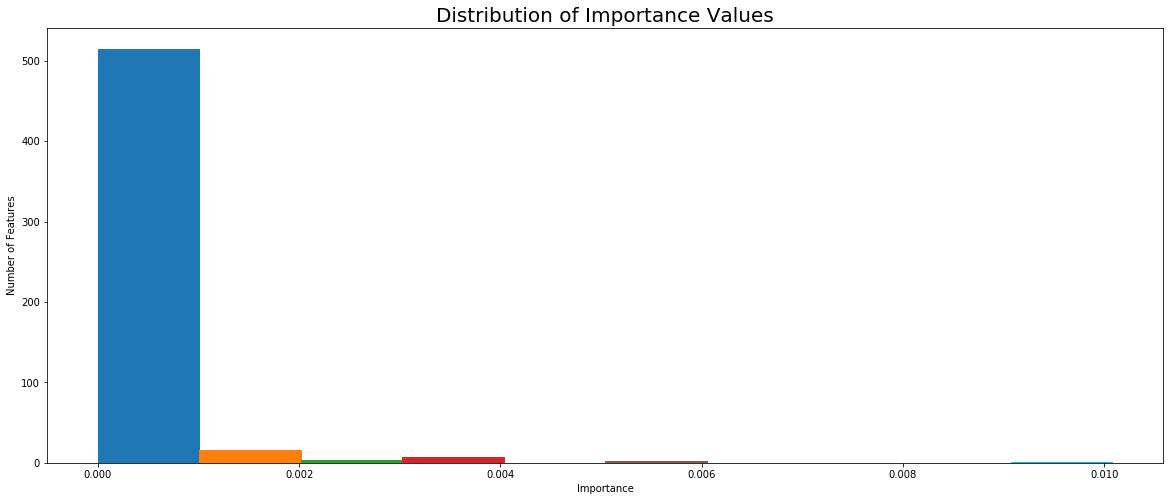

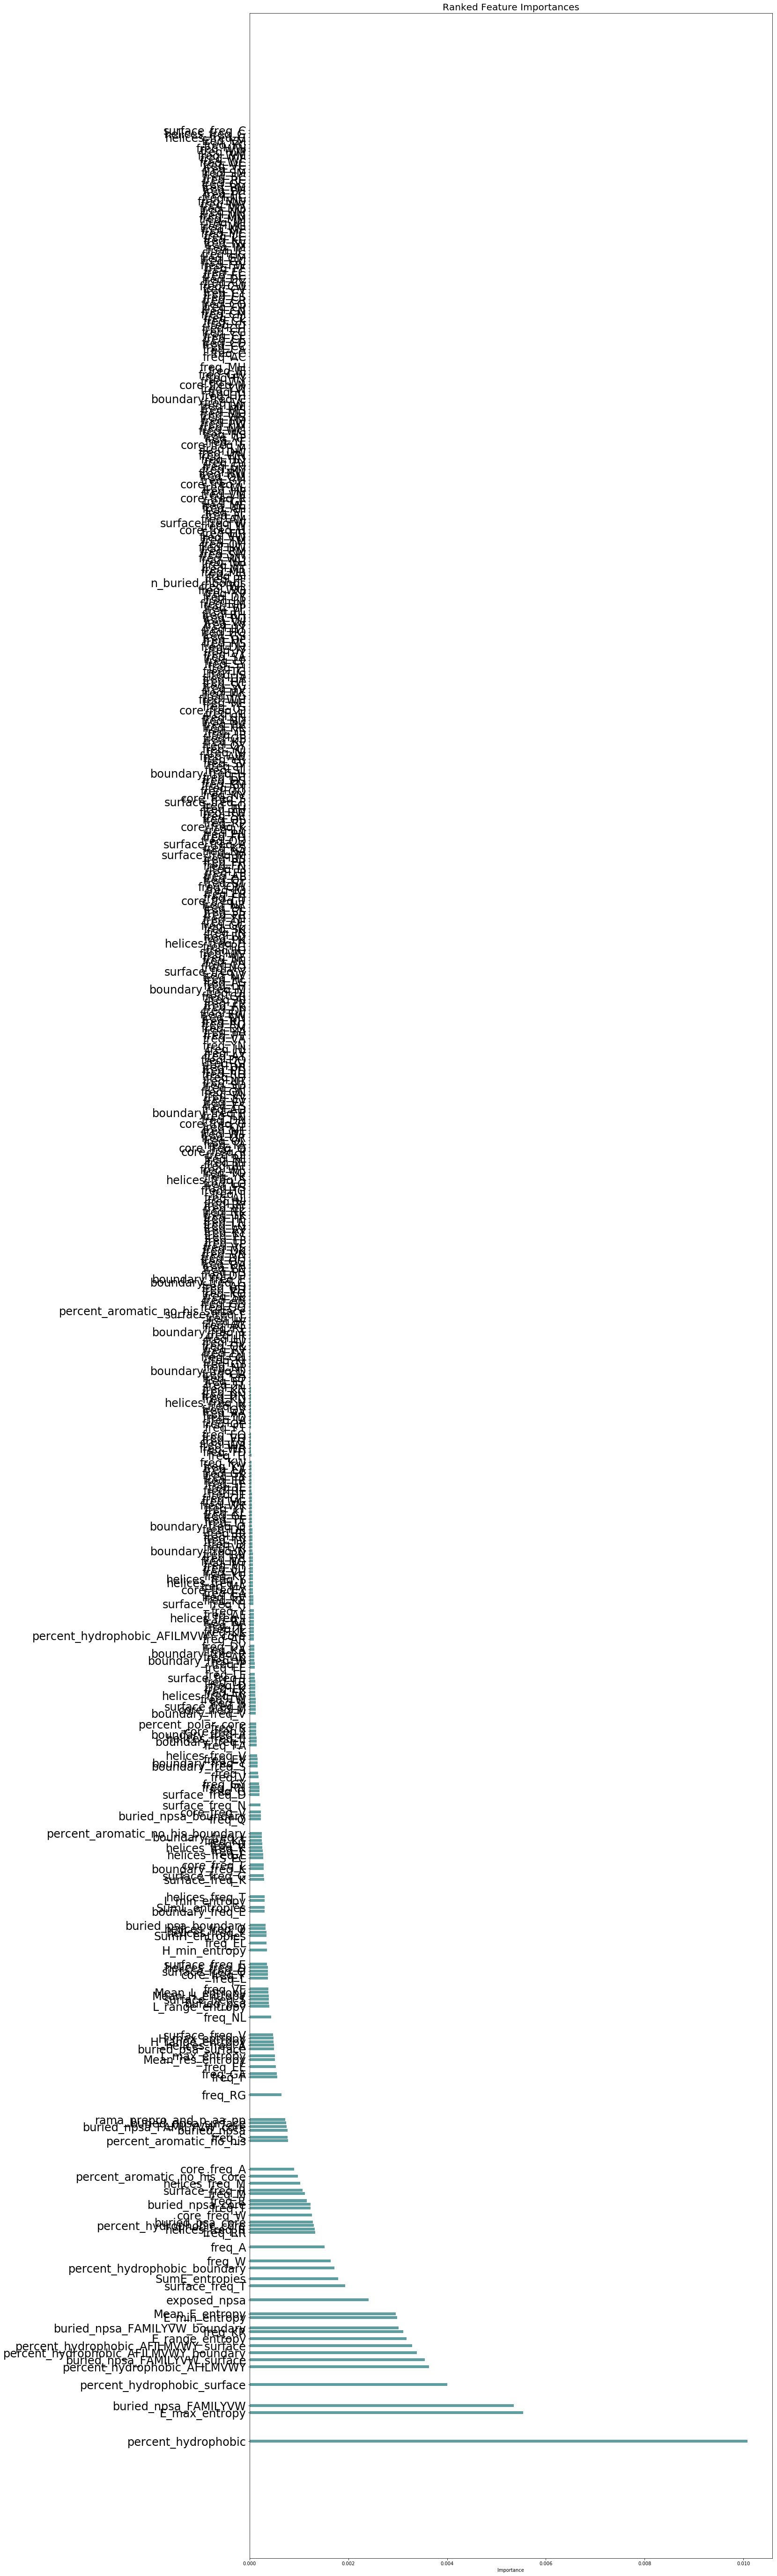

In [38]:
rocklin_features_with_spc = pd.read_csv('/home/jupyter/tacc-work/test-harness-v3/test-harness/scripts/analyze_new_metrics_for_rocklin_data/test_harness_results/runs/run_aYmAv7MLQqrG6/feature_importances.csv')


rocklin_features_with_spc['new_feature'] = rocklin_features_with_spc['Feature'].isin(entropy_features+new_features)

output_dictionary = get_plots(rocklin_features_with_spc[rocklin_features_with_spc['new_feature']==True])


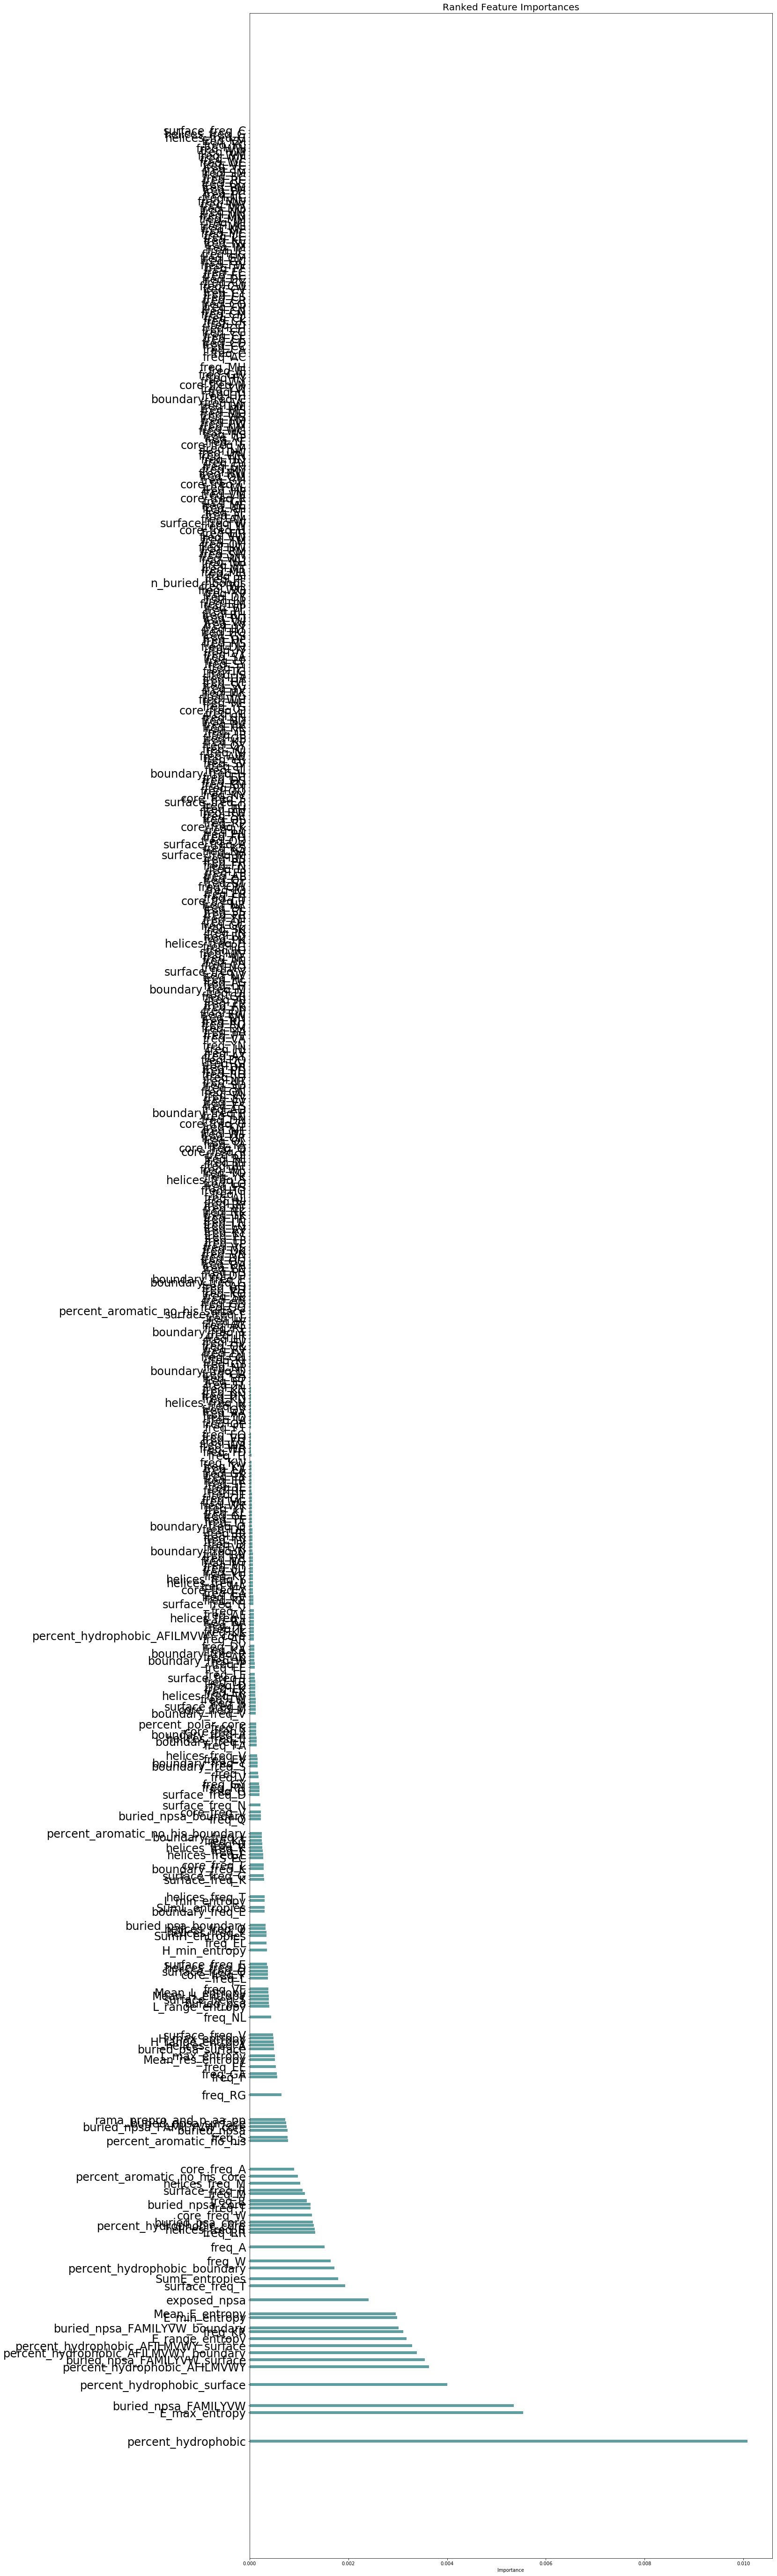

In [41]:
output_dictionary['Horizontal Bar Plot']


In [39]:
rocklin_features_with_spc[rocklin_features_with_spc['new_feature']==True]

,Feature,Importance,new_feature
3,percent_hydrophobic,0.010081,True
11,E_max_entropy,0.005537,True
13,buried_npsa_FAMILYVW,0.005352,True
19,percent_hydrophobic_surface,0.004001,True
24,percent_hydrophobic_AFILMVWY,0.003635,True
26,buried_npsa_FAMILYVW_surface,0.003547,True
28,percent_hydrophobic_AFILMVWY_boundary,0.003389,True
30,percent_hydrophobic_AFILMVWY_surface,0.003293,True
32,E_range_entropy,0.003179,True
34,freq_KR,0.003113,True


# Q: Should I divide the Global Highest Importance by the count of each topology in order to account for differing amount of proteins per each topology?

In [17]:
df_sd2e = pd.read_csv("/home/jupyter/tacc-work/test-harness-v3/versioned-datasets/data/protein-design/aggregated_data/all_libs_cleaned.v3.aggregated_data.csv",comment="#")
df_rocklin_spc = pd.read_csv('/home/jupyter/tacc-work/test-harness-v3/versioned-datasets/data/protein-design/configurational_entropy/Rocklin.v1.configurational_entropy.csv',comment='#')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
df_rocklin = df_sd2e[df_sd2e['dataset']=='Rocklin']
df_rocklin['topology'].value_counts()

EEHEE    5247
HEEH     4986
EHEE     3457
HHH      2469
Name: topology, dtype: int64

In [19]:
shap_rocklin_features_importances

,Feature,Importance
0,surface_freq_T,0.028203
1,percent_hydrophobic,0.025790
2,buried_npsa_FAMILYVW,0.021430
3,freq_T,0.019735
4,buried_npsa,0.016360
5,percent_hydrophobic_AFILMVWY,0.014979
6,rama_prepro_and_p_aa_pp,0.012645
7,exposed_npsa,0.010069
8,freq_L,0.008609
9,helices_freq_A,0.008141
